## Customer Segmentation Project

Perusahaan sedang berusaha untuk mengenal lebih baik pelanggannya. Tujuannya agar perusahaan dapat membuat strategi pemasaran yang lebih tepat dan juga efisien bagi tiap tiap pelanggan.


List column data:
- Customer ID: Kode pelanggan dengan format campuran teks CUST- diikuti angka
- Nama Pelanggan: Nama dari pelanggan dengan format teks tentunya
- Jenis Kelamin: Jenis kelamin dari pelanggan, hanya terdapat dua isi data kategori yaitu Pria dan Wanita
- Umur: Umur dari pelanggan dalam format angka
- Profesi: Profesi dari pelanggan, juga bertipe teks kategori yang terdiri dari Wiraswasta, Pelajar, - - - Professional, Ibu Rumah Tangga, dan Mahasiswa.
- Tipe Residen: Tipe tempat tinggal dari pelanggan kita, untuk dataset ini hanya ada dua kategori: Cluster dan Sector.
- Nilai Belanja Setahun: Merupakan total belanja yang sudah dikeluarkan oleh pelanggan tersebut.

#### Mempersiapkan Library
Masalah ini akan dapat di selesaikan dengan menggunakan bantuan library - library di bawah ini:

- Pandas, digunakan untuk melakukan pemrosesan analisis data
- Matplotlib, digunakan sebagai dasar untuk melakukan visualisasi data
- Seaborn, digunakan di atas matplotlib untuk melakukan data visualisasi yang lebih menarik
- Scikit - Learn, digunakan untuk mempersiapkan data sebelum dilakukan permodelan
- kmodes, digunakan untuk melakukan permodelan menggunakan algoritma K-Modes dan K-Prototypes.
- Pickle, digunakan untuk melakukan penyimpanan dari model yang akan di buat.

In [1]:
import pandas as pd  
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder  
  
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
  
import pickle  
from pathlib import Path  

In [2]:
# import dataset  
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")  

# show data
df.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


In [3]:
# inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


In [4]:
# transfrom all column to lowercase
df.columns = df.columns.map(str.lower)
df.columns

Index(['customer_id', 'nama pelanggan', 'jenis kelamin', 'umur', 'profesi',
       'tipe residen', 'nilaibelanjasetahun'],
      dtype='object')

## Eksplorasi Data Numerik

In [5]:
# statistik deskriptif data numerik
df.describe()

,umur,nilaibelanjasetahun
count,50.000000,5.000000e+01
mean,37.500000,7.069875e+06
std,14.673661,2.590619e+06
min,14.000000,2.722700e+06
25%,25.000000,5.257530e+06
50%,35.000000,5.980077e+06
75%,49.750000,9.739615e+06
max,64.000000,1.088451e+07


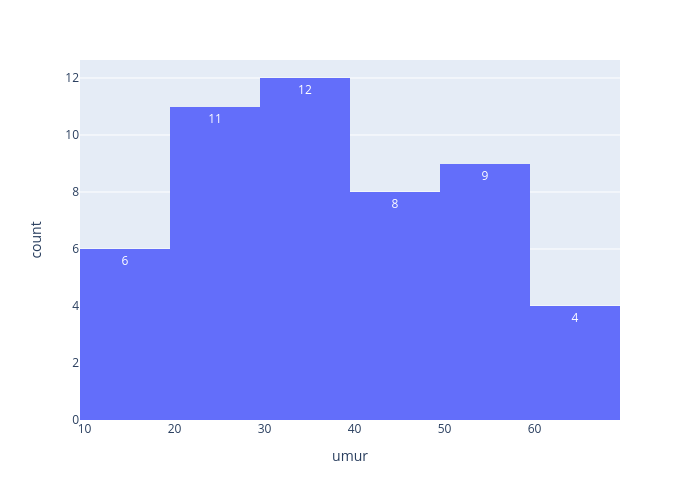

In [6]:
# distribution umur
fig = px.histogram(df,
                   x = 'umur',
                   text_auto= True)
fig.show(renderer='png')

In [7]:
# distribution nilai belanja tahunan
fig = px.box(df,
            y= 'nilaibelanjasetahun',
            title= 'Korelasi Umur dan Nilai Belanja Tahunan',
            labels= {'nilaibelanjasetahun': 'Nilai Belanja Tahunan'})
fig.show()

/tmp/ipykernel_33662/1067518991.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_33662/1067518991.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  ras

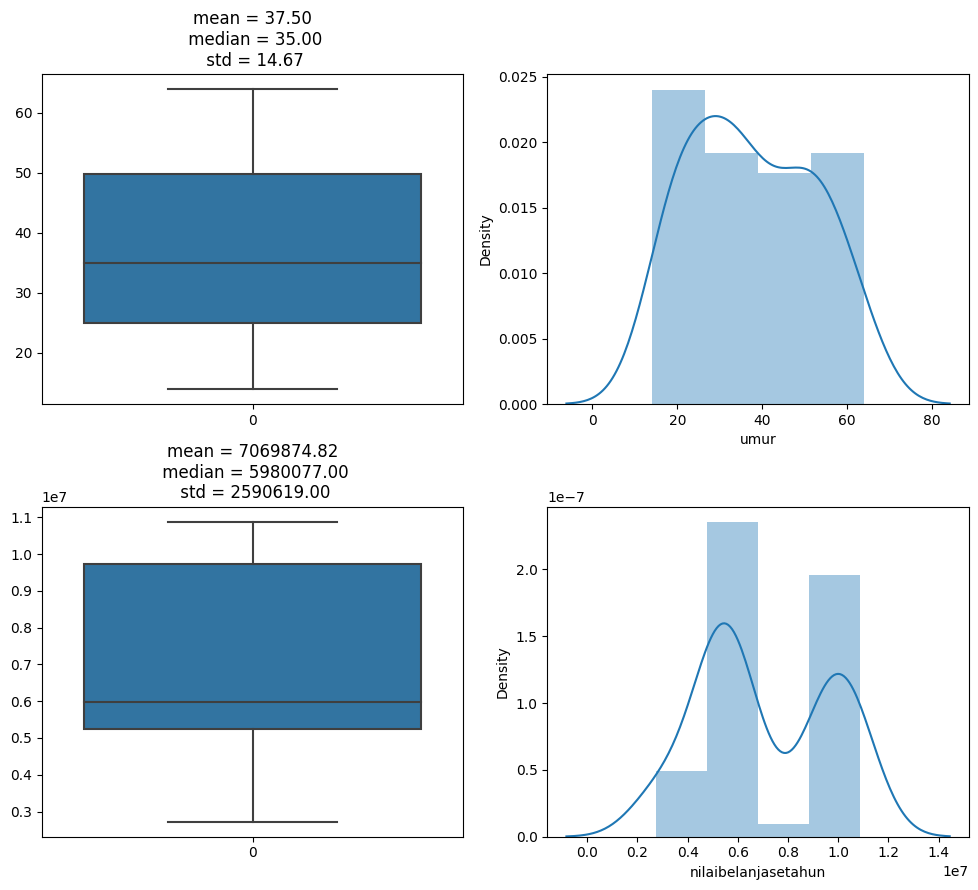

In [8]:
# Fungsi untuk membuat plot  
def observasi_num(features):  
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    sns.boxplot(df[kol], ax = axs[i][0])
	    sns.distplot(df[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  
  
# Memanggil fungsi untuk membuat Plot untuk data numerik  
kolom_numerik = ['umur','nilaibelanjasetahun']
observasi_num(kolom_numerik) 

## Eksplorasi Data Kategorikal

In [9]:
fig = px.pie(df,
             names= 'profesi',
             values= 'nilaibelanjasetahun',
             facet_col= 'tipe residen',
             title= 'Jumlah pengeluaran tahunan berdasarkan profesi dan tipe residen')
fig.show()

lakukan permodelan dengan menggunakan teknik unsupervised clustering. Algoritma yang akan digunakan adalah **K-Prototypes**. Salah satu faktor utama dalam algoritma ini adalah perlu menggunakan data yang skala antar variabelnya setara. Selain itu kita juga perlu melakukan encoding kolom - kolom kategorikal yang dimiliki menjadi numerik. Kemudian menggabungkan hasil pemrosesan data tersebut menjadi satu dataframe untuk digunakan dalam permodelan.

## Standarisasi Kolom Numerik

In [10]:
from sklearn.preprocessing import StandardScaler  
  
kolom_numerik = ['umur','nilaibelanjasetahun']  
  
# Statistik sebelum Standardisasi  
print('Statistik Sebelum Standardisasi\n')  
print(df[kolom_numerik].describe().round(1))
print('\n')  
  
# Standardisasi
scaler = StandardScaler() 
df_std = scaler.fit_transform(df[kolom_numerik])  
  
# Membuat DataFrame  
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)  
  
# Menampilkan contoh isi data dan summary statistic  
print('Contoh hasil standardisasi\n')  
print(df_std.head())  
print('\n')  
  
print('Statistik hasil standardisasi\n')  
print(df_std.describe().round(0))  

Statistik Sebelum Standardisasi

       umur  nilaibelanjasetahun
count  50.0                 50.0
mean   37.5            7069874.8
std    14.7            2590619.0
min    14.0            2722700.0
25%    25.0            5257529.8
50%    35.0            5980077.0
75%    49.8            9739615.0
max    64.0           10884508.0


Contoh hasil standardisasi

       umur  nilaibelanjasetahun
0  1.411245             0.946763
1 -1.617768            -1.695081
2  0.722833            -0.695414
3  1.067039            -0.727361
4  0.240944             1.382421


Statistik hasil standardisasi

       umur  nilaibelanjasetahun
count  50.0                 50.0
mean   -0.0                 -0.0
std     1.0                  1.0
min    -2.0                 -2.0
25%    -1.0                 -1.0
50%    -0.0                 -0.0
75%     1.0                  1.0
max     2.0                  1.0


## Konversi Kategorikal Data dengan Label Encoder
Karena saat pemodelan tidak dapat memproses data kategorikal, maka perlu dikonversi menjadi numerik

In [11]:
from sklearn.preprocessing import LabelEncoder
  
# Inisiasi nama kolom kategorikal  
kolom_kategorikal = ['jenis kelamin','profesi','tipe residen']  
  
# Membuat salinan data frame
enc = LabelEncoder()  
df_encode = df[kolom_kategorikal].copy()   
  
# Melakukan labelEncoder untuk semua kolom kategorikal  
for col in kolom_kategorikal:  
    df_encode[col] = enc.fit_transform(df_encode[col])
      
# Menampilkan data  
print(df_encode.head())


   jenis kelamin  profesi  tipe residen
0              0        4             1
1              1        2             0
2              0        3             0
3              0        3             0
4              1        4             0


In [12]:
# Menggabungkan data frame
df_model = df_encode.merge(df_std, left_index = True, right_index=True, how= 'left')  
print(df_model.head())

   jenis kelamin  profesi  tipe residen      umur  nilaibelanjasetahun
0              0        4             1  1.411245             0.946763
1              1        2             0 -1.617768            -1.695081
2              0        3             0  0.722833            -0.695414
3              0        3             0  1.067039            -0.727361
4              1        4             0  0.240944             1.382421


## Apa itu Clustering dan Algoritma K-Prototypes

Clustering adalah proses pembagian objek-objek ke dalam beberapa kelompok (cluster) berdasarkan tingkat kemiripan antara satu objek dengan yang lain.

Terdapat beberapa algoritma untuk melakukan clustering ini. Salah satu yang populer adalah k-means.

K-means itu sendiri biasa nya hanya digunakan untuk data-data yang bersifat numerik. Sedangkan untuk yang bersifat kategorikal saja, kita bisa menggunakan k-modes.

Salah satu parameter penting yang harus dimasukkan pada algoritma kprototype adalah jumlah cluster yang diinginkan. Oleh karena itu, perlu mencari jumlah cluster yang optimal. Salah satu cara untuk mendapatkan nilai optimal tersebut adalah dengan menggunakan bantuan 'elbow plot'.

Elbow plot ini dapat dibuat dengan cara memvisualisasikan total jarak seluruh data kita ke pusat cluster-nya. Selanjutnya kita memilih titik siku dari pola yang terbentuk dan menjadikannya sebagai jumlah cluster kita.

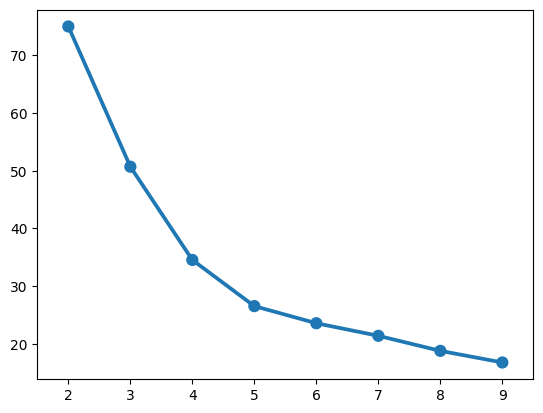

In [13]:
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes
# Melakukan Iterasi untuk Mendapatkan nilai Cost  
cost = {}  
for k in range(2,10):
	kproto = KPrototypes(n_clusters = k,random_state=75)
	kproto.fit_predict(df_model, categorical=[0,1,2])
	cost[k]= kproto.cost_  
  
# Memvisualisasikan Elbow Plot  
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))  
plt.show()

Dari hasil tersebut, dapat mengetahui titik siku dari plot tersebut adalah pada saat k = 5. Sehingga dapat diputuskan untuk menggunakan 5 sebagai jumlah cluster optimalnya.

In [14]:
# buat model
kproto = KPrototypes(n_clusters=5, random_state = 75)
kproto = kproto.fit(df_model, categorical=[0,1,2])
  
#Save Model  
pickle.dump(kproto, open('cluster.pkl', 'wb')) 

In [15]:
# Menentukan segmen tiap pelanggan    
clusters =  kproto.predict(df_model, categorical=[0,1,2])    
print('segmen pelanggan: {}\n'.format(clusters))    
    
# Menggabungkan data awal dan segmen pelanggan    
df_final = df.copy()
df_final['cluster'] = clusters
print(df_final.head()) 

segmen pelanggan: [1 0 2 2 3 4 1 2 4 4 2 2 1 1 3 4 4 2 3 0 3 2 4 3 3 2 3 4 2 2 0 1 0 3 4 3 4
 1 4 0 4 3 4 3 4 3 2 1 4 1]

  customer_id       nama pelanggan jenis kelamin  umur       profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  tipe residen  nilaibelanjasetahun  cluster  
0       Sector              9497927        1  
1      Cluster              2722700        0  
2      Cluster              5286429        2  
3      Cluster              5204498        2  
4      Cluster             10615206        3  


## Menamakan Cluster
Dari hasil observasi yang dilakukan kamu dapat memberikan nama segmen dari tiap tiap nomor klusternya, yaitu:

- Cluster 0: Diamond Young Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi  rata-rata mendekati 10 juta. Selain itu isi dari cluster ini memiliki umur sekitar 18 - 41 tahun dengan rata-ratanya adalah 29 tahun.
- Cluster 1: Diamond Senior Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Isi dari cluster ini memiliki umur sekitar 45 - 64 tahun dengan rata-ratanya adalah 55 tahun.
- Cluster 2: Silver Students, isi cluster ini adalah para pelajar dan mahasiswa dengan rata-rata umur mereka adalah 16 tahun dan nilai belanja setahun mendekati 3 juta.
- Cluster 3: Gold Young Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia muda dengan rentang umur sekitar 20 - 40 tahun dan dengan rata-rata 30 tahun dan nilai belanja setahunnya mendekati 6 juta.
- Cluster 4: Gold Senior Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia tua dengan rentang umur 46 - 63 tahun dan dengan rata-rata 53 tahun dan nilai belanja setahunnya mendekati 6 juta.

In [16]:
# Mapping nama kolom  
df_final['segmen'] = df_final['cluster'].map({  
    0: 'Diamond Young Member',  
    1: 'Diamond Senior Member',  
    2: 'Silver Member',  
    3: 'Gold Young Member',  
    4: 'Gold Senior Member'  
})  

df_final.head()

,customer_id,nama pelanggan,jenis kelamin,umur,profesi,tipe residen,nilaibelanjasetahun,cluster,segmen
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1,Diamond Senior Member
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,0,Diamond Young Member
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,2,Silver Member
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,2,Silver Member
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,3,Gold Young Member


In [17]:
# Menampilkan data pelanggan berdasarkan cluster nya  
for i in range(0, 5):
	print('\nPelanggan cluster: {}\n'.format(i))
	print(df_final[df_final['cluster']== i])


Pelanggan cluster: 0

   customer_id    nama pelanggan jenis kelamin  umur    profesi tipe residen  \
1     CUST-002  Shirley Ratuwati        Wanita    14    Pelajar      Cluster   
19    CUST-020    Irene Novianto        Wanita    16    Pelajar       Sector   
30    CUST-031     Eviana Handry        Wanita    19  Mahasiswa      Cluster   
32    CUST-033   Cecilia Kusnadi        Wanita    19  Mahasiswa      Cluster   
39    CUST-040    Irene Darmawan        Wanita    14    Pelajar       Sector   

    nilaibelanjasetahun  cluster                segmen  
1               2722700        0  Diamond Young Member  
19              2896845        0  Diamond Young Member  
30              3042773        0  Diamond Young Member  
32              3047926        0  Diamond Young Member  
39              2861855        0  Diamond Young Member  

Pelanggan cluster: 1

   customer_id    nama pelanggan jenis kelamin  umur     profesi tipe residen  \
0     CUST-001      Budi Anggara          Pria    

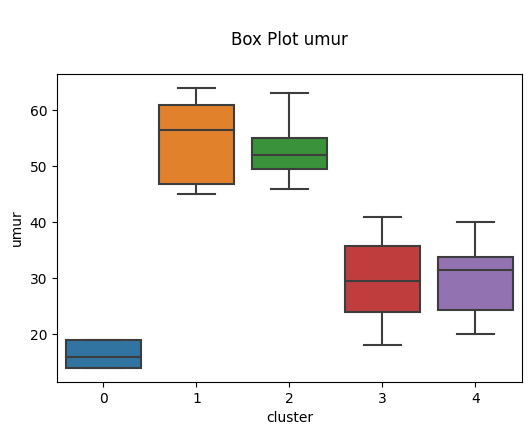

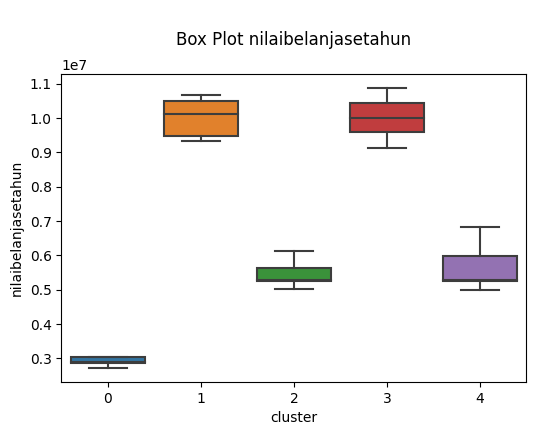

In [18]:
# visualisasi hasil clustering
kolom_numerik = ['umur','nilaibelanjasetahun']  
  
for i in kolom_numerik:  
    plt.figure(figsize=(6,4))  
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final)  
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)  
    plt.show() 

note:
- lower fence (Q1 - 1.5*IQR),
- Q1
- Q2
- Q3
- upper fence (Q3 + 1.5*IQR)

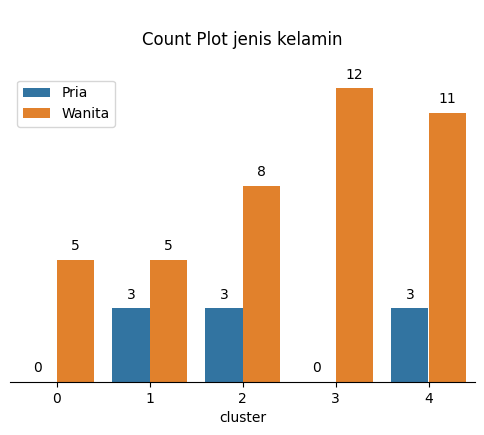

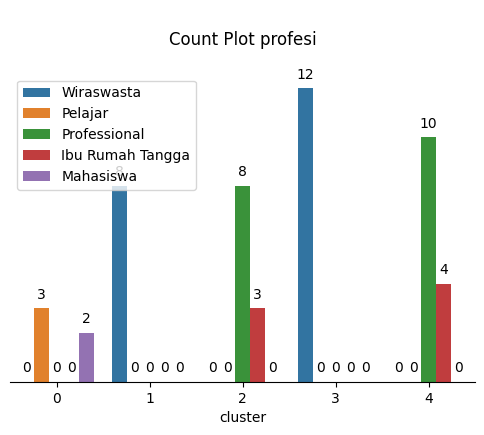

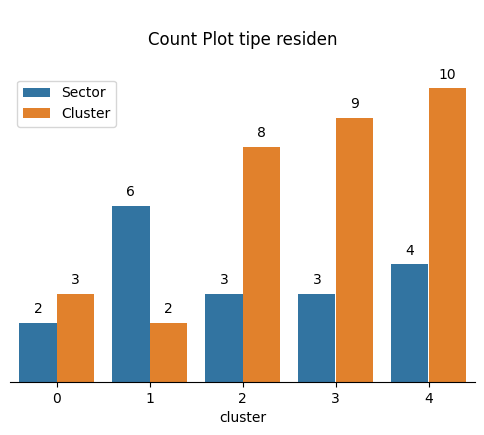

In [19]:
# Visualisasi Hasil Clustering - Count Plot
# Data Kategorikal  
kolom_categorical = ['jenis kelamin','profesi','tipe residen']  
  
for i in kolom_categorical:  
    plt.figure(figsize=(6,4))  
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )  
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)  
    ax.legend(loc="upper left")  
    for p in ax.patches:  
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha = 'center',  
                     va = 'center',  
                     xytext = (0, 10),  
                     textcoords = 'offset points')  
      
    sns.despine(right=True,top = True, left = True)  
    ax.axes.yaxis.set_visible(False)  
    plt.show()  

Pada aplikasi di industri proses penentuan cluster yang optimum bisa dilakukan juga dengan melihat matriks evaluasi lainnya seperti sillhoute score dan callinski-harabaz score. Selain itu penentuan jumlah cluster yang optimal juga perlu mepertimbangkan masukan dari tim yang akan menggunakan modelnya. Sehingga bisa menghasilkan cluster yang sesuai dengan kebutuhan mereka dan juga bagaimana cara mereka akan memperlakukan segmen-segmen ini.

## Mempersiapan Data Baru untuk Prediksi

In [24]:
# Data Baru  
data = [{  
    'Customer_ID': 'CUST-100' ,  
    'Nama Pelanggan': 'Joko' ,  
    'Jenis Kelamin': 'Pria',  
    'Umur': 45,  
    'Profesi': 'Wiraswasta',  
    'Tipe Residen': 'Cluster' ,  
    'NilaiBelanjaSetahun': 8230000  
      
}]  
  
# Membuat Data Frame  
new_df = pd.DataFrame(data)  
# transform all column to lowercase
new_df.columns = new_df.columns.map(str.lower)  
# Melihat Data  
print(new_df)  

  customer_id nama pelanggan jenis kelamin  umur     profesi tipe residen  \
0    CUST-100           Joko          Pria    45  Wiraswasta      Cluster   

   nilaibelanjasetahun  
0              8230000  


Melakukan standardisasi kolom numerikal

Untuk melakukan standardisasi dengan variable yang sama pada saat permodelan kita perlu menggunakan nilai rata-rata dan standard deviasi dari tiap variabel pada saat kita melakukan permodelan, yaitu:

Umur

- Rata - rata: 37.5
- Standard Deviasi: 14.7

NilaiBelanjaSetahun

- Rata - rata: 7069874.8
- Standard Deviasi: 2590619.0

Dari nilai-nilai tersebut kita dapat menghitung nilai standardisasi (Z) dengan menggunakan rumus Z = (x - u)/s dengan x adalah tiap nilai, u adalah rata-rata dan s adalah standard deviasi.

In [25]:
def data_preprocess(data):  
    # Konversi Kategorikal data  
    kolom_kategorikal = ['jenis kelamin','profesi','tipe residen']  
      
    df_encode = data[kolom_kategorikal].copy()  
  
    ## jenis kelamin   
    df_encode['jenis kelamin'] = df_encode['jenis kelamin'].map({  
        'Pria': 0,  
        'Wanita' : 1  
    })   
      
    ## profesi  
    df_encode['profesi'] = df_encode['profesi'].map({  
        'Ibu Rumah Tangga': 0,  
        'Mahasiswa' : 1,  
        'Pelajar': 2,  
        'Professional': 3,  
        'Wiraswasta': 4  
    })  
      
    ## tipe residen  
    df_encode['tipe residen'] = df_encode['tipe residen'].map({  
        'Cluster': 0,  
        'Sector' : 1  
    })  
      
    # Standardisasi Numerical Data  
    kolom_numerik = ['umur','nilaibelanjasetahun']  
    df_std = data[kolom_numerik].copy()  
      
    ## Standardisasi Kolom Umur  
    df_std['umur'] = (df_std['umur'] - 37.5)/14.7  
      
    ## Standardisasi Kolom Nilai Belanja Setahun  
    df_std['nilaibelanjasetahun'] = (df_std['nilaibelanjasetahun'] - 7069874.8)/2590619.0  
      
    # Menggabungkan Kategorikal dan numerikal data  
    df_model = df_encode.merge(df_std, left_index = True,  
                           right_index=True, how = 'left')  
      
    return df_model  
  
# Menjalankan fungsi  
new_df_model = data_preprocess(new_df)  
  
print(new_df_model) 

   jenis kelamin  profesi  tipe residen      umur  nilaibelanjasetahun
0              0        4             0  0.510204             0.447818


In [27]:
# memanggil model dan prediksi
def modelling (data):  
      
    # Memanggil Model  
    kpoto = pickle.load(open('cluster.pkl', 'rb'))  
      
    # Melakukan Prediksi  
    clusters = kpoto.predict(data,categorical=[0,1,2])  
      
    return clusters  
  
# Menjalankan Fungsi  
clusters = modelling(new_df_model)  

def menamakan_segmen (data_asli, clusters):  
      
    # Menggabungkan cluster dan data asli  
    final_df = data_asli.copy()  
    final_df['cluster'] = clusters
      
    # Menamakan segmen  
    final_df['segmen'] = final_df['cluster'].map({  
        0: 'Diamond Young Member',  
        1: 'Diamond Senior Member',  
        2: 'Silver Students',  
        3: 'Gold Young Member',  
        4: 'Gold Senior Member'  
    })  
      
    return final_df
  
# Menjalankan Fungsi  
new_final_df = menamakan_segmen (new_df,clusters)  
  
print(new_final_df)  

  customer_id nama pelanggan jenis kelamin  umur     profesi tipe residen  \
0    CUST-100           Joko          Pria    45  Wiraswasta      Cluster   

   nilaibelanjasetahun  cluster                 segmen  
0              8230000        1  Diamond Senior Member  
